<a href="https://colab.research.google.com/github/aarna97pandey/Text-Extraction-from-Images/blob/master/Text_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

#Connecting the notebook to the Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Import the gdrive
from google.colab import drive
from google.colab import files

In [0]:
#Libraries for preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import six.moves.urllib as urllib
import numpy as np
import csv
import cv2
import glob
import os
import sys

In [4]:
#Importing the train set and labels
trainsetX=[]
path = '/content/gdrive/My Drive/assignment/TL/'


for filename in glob.glob(path + '/*.jpeg'):
    img= cv2.imread(filename,0)
    img = np.asarray(img)
    trainsetX.append(img)
    
print(len(trainsetX))

161


161
(161,)
80
564


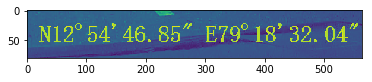

In [5]:
#FORM THE NUMPY ARRAY FROM THE LIST OF TRIANING LABELS
Train_Images = np.array(trainsetX) 
print(len(Train_Images))

#print(Train_Images[0].shape)
no_images = len(Train_Images)
nimg = Train_Images.shape
nR = Train_Images[2].shape[0]
nC = Train_Images[2].shape[1]
plt.imshow(Train_Images[2])
print(nimg)
print(nR)
print(nC)

In [0]:
#nR= 80
#nC=564

In [0]:
#VISUALIZATION OF THE DATASET
img = Train_Images[80]
img.shape
height, width = img.shape[:2]
img = cv2.resize(img,(3*width,height), interpolation = cv2.INTER_CUBIC)#plt.imshow(A)

(80, 1692)

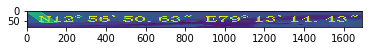

In [8]:
plt.imshow(img)
img.shape

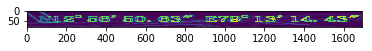

In [9]:
kernel = np.ones((5,5),np.uint8)
img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(img_grad)

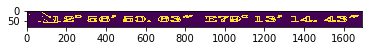

In [10]:
_,img_bin = cv2.threshold(img_grad,0,255,cv2.THRESH_OTSU)
plt.imshow(img_bin)

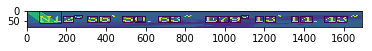

In [11]:
_,contours,hierarchy = cv2.findContours(img_bin,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
imgs = []
for i in range(hierarchy.shape[1]):
    x,y,w,h = cv2.boundingRect(contours[i])
    if(not (h < 15 or w < 15)):
        count = cv2.countNonZero(img_bin[y:y+h,x:x+w])
        r = count/(w*h)
        #if (r>0.25):
        cropped = img[y:y+h,x:x+w]
        imgs.append(cropped)
        cv2.rectangle(img,(x, y), (x+w, y+h), (0,0 ,255), 3);
         
plt.imshow(img)        


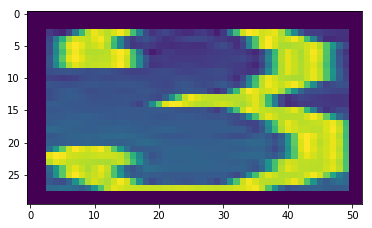

In [12]:
plt.imshow(imgs[1])      


In [0]:

img = cv2.resize(img,(width,3*height), interpolation = cv2.INTER_CUBIC)#plt.imshow(A)

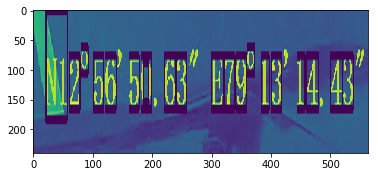

In [14]:
plt.imshow(img)      


In [0]:
# to detect the numbers from all the images
detected_image=[]

def detect(Train_Images):
  for img in Train_Images :
      img = Train_Images[80]
      img.shape
      height, width = img.shape[:2]
      img = cv2.resize(img,(3*width,height), interpolation = cv2.INTER_CUBIC)#plt.imshow(A)
      kernel = np.ones((5,5),np.uint8)
      img_grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
      _,img_bin = cv2.threshold(img_grad,0,255,cv2.THRESH_OTSU)
      _,contours,hierarchy = cv2.findContours(img_bin,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
      imgs = []
      for i in range(hierarchy.shape[1]):
          x,y,w,h = cv2.boundingRect(contours[i])
          if(not (h < 15 or w < 15)):
               count = cv2.countNonZero(img_bin[y:y+h,x:x+w])
               r = count/(w*h)
               #if (r>0.25):
               cropped = img[y:y+h,x:x+w]
               imgs.append(cropped)
               cv2.rectangle(img,(x, y), (x+w, y+h), (0,0 ,255), 3);
      detected_image.append(imgs)        


detect(Train_Images)


In [16]:
print(len(detected_image))
print((detected_image[0]))

161
[array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  94,  71,  68,  69,  70,  75,  79,  77,  73,  70,
         71,  73,  76,  78,  80,  81,  72,  61,  77, 125,   0,   0],
       [  0,   0,   0,  96,  87,  80,  74,  71,  72,  73,  73,  73,  75,
         81,  88,  91,  89,  83,  78,  70,  64,  80, 121,   0,   0],
       [  0,   0,   0,  85,  85,  88,  89,  88,  85,  82,  79,  77,  76,
         76,  78,  81,  86,  92,  95,  93,  89,  88,  86,   0,   0],
       [  0,   0,   0,  77,  78,  81,  80,  74,  66,  62,  65,  73,  80,
         84,  85,  86,  87,  88,  86,  82,  78,  74,  64,   0,   0],
 

#Recognition training

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


<Figure size 432x288 with 0 Axes>

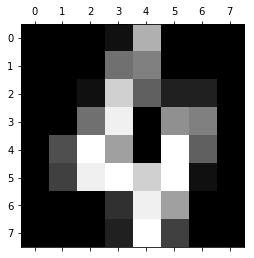

In [18]:
plt.gray() 
plt.matshow(digits.images[4]) 
plt.show()

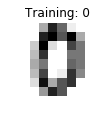

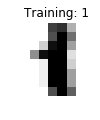

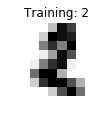

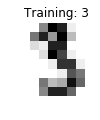

Image Shape  :  (8, 8)
[8 8 4 9 0 8 9 8 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 9 6 7 8 9
 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 9 1 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9
 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1
 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 7 8 2 0
 1 2 6 3 3 7 3 3 4 6 6 6 9 9 1 5 0 9 5 2 8 2 0 0 1 7 6 3 2 1 5 4 6 3 1 7 9
 1 7 6 8 4 3 1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8
 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0
 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9
 5 2 8 2 0 0 1 7 6 3 2 2 7 4 6 3 1 3 9 1 7 6 8 4 3 1 4 0 5 3 6 9 6 8 7 5 4
 4 7 2 8 2 2 5 7 9 5 4 8 8 4 9 0 8 9 8 0 9 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1 0 0 2 2 7 8 2
 0 1 2 6 3 3 7 3 3 4 6 6 6 4 9 1 5 0 9 6 2 8 3 0 0 1 7 6 3 2 1 7 4 6 3 1 3
 9

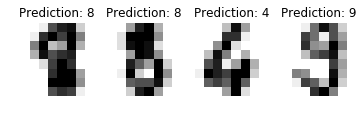

In [19]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)
    plt.show()
    
print("Image Shape  : ", end=" ")
print(digits.images[0].shape)  

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples // 2:]
predicted = classifier.predict(data[n_samples // 2:])
print(predicted)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

#Text extraction from image 


In [20]:
#Function to recognize the the digits and characters in the detection images 


dim= (digits.images[0].shape[0], digits.images[0].shape[1])# width and height of image
print(dim)


def classify_me(detected_images):
   predicted_values=[]
   for i in detected_images:
       values=[]
       for img in i:
         # dim = (width,height) 
          resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 
          resized = resized.reshape(1,-1)
          predicted = classifier.predict(resized)
          values.append(predicted)
       predicted_values.append(values)   
       print(" ")   
   return predicted    
          
          

#  contains the list of all the classified values.....
predicted = classify_me(detected_image) 
#print(predicted)

(8, 8)
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
